In [151]:
import math
import warnings
from colorama import Fore

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Load the file 

In [152]:
df = pd.read_csv('/Users/johfoxwo/Documents/ff3f.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['Month',
 'Mkt-RF',
 'SMB',
 'HML',
 'SMALL LoBM-RF',
 'ME1 BM2-RF',
 'SMALL HiBM-RF',
 'BIG LoBM-RF',
 'ME2 BM2-RF',
 'BIG HiBM-RF']

# Assign the variables

In [153]:
# Time
month = df.loc[:,'Month']

# independent factors 
market_return, small_vs_big, value_vs_growth = df.loc[:,'Mkt-RF'], df.loc[:,'SMB'], df.loc[:,'HML']

# dependent factors on small companies across style
small_growth_excess_return, small_neutral_excess_return = df.loc[:,'SMALL LoBM-RF'], df.loc[:,'ME1 BM2-RF']

small_value_excess_return = df.loc[:,'SMALL HiBM-RF']   

# dependent factors on large companies across style 
large_growth_excess_return, large_neutral_excess_return = df.loc[:,'BIG LoBM-RF'], df.loc[:,'ME2 BM2-RF']

large_value_excess_return = df.loc[:,'BIG HiBM-RF']

In [154]:
# Sanity check for length
len(month), len(market_return), len(small_vs_big), len(value_vs_growth),len(small_growth_excess_return), len(small_neutral_excess_return), len(small_value_excess_return),len(large_growth_excess_return), len(large_neutral_excess_return), len(large_value_excess_return)

(1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104)

# Subset of independent variables

In [155]:
three = [market_return, small_vs_big, value_vs_growth]

df_three = pd.DataFrame(data=three)

df_three.reset_index()

df_independent_factors = df_three.transpose()

df_independent_factors.rename (columns={'Mkt-RF' : 'Market_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'SMB' : 'Size_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'HML' : 'Style_Risk_Factor'}, inplace=True)

df_independent_factors.describe()

,Market_Risk_Factor,Size_Risk_Factor,Style_Risk_Factor
count,1104.000,1104.000,1104.000
mean,0.662,0.216,0.373
std,5.332,3.200,3.490
min,-29.130,-17.280,-13.280
25%,-1.970,-1.560,-1.305
50%,1.015,0.080,0.155
75%,3.635,1.745,1.732
max,38.850,36.700,35.460


# Correlation Matrix of Independent Factors

In [156]:
corr = df_independent_factors.corr()

Text(0.5,1,'Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018')

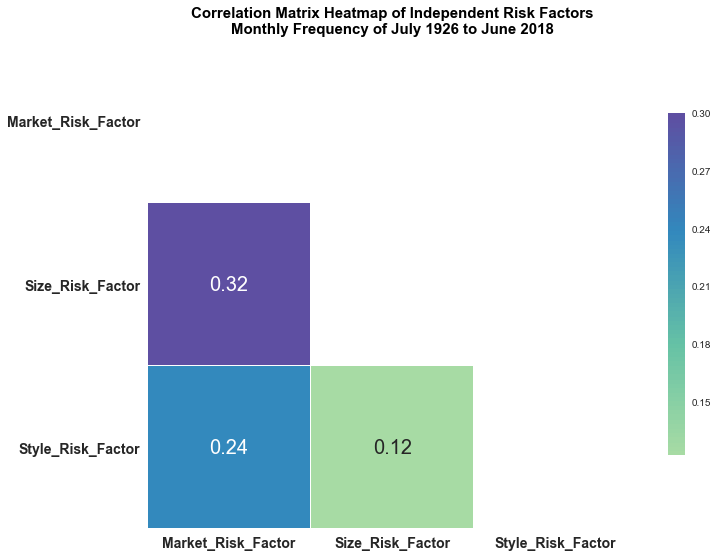

In [157]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.yticks(rotation=0, fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title('Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018'
          , fontweight='bold', fontsize=15,color='k')

C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


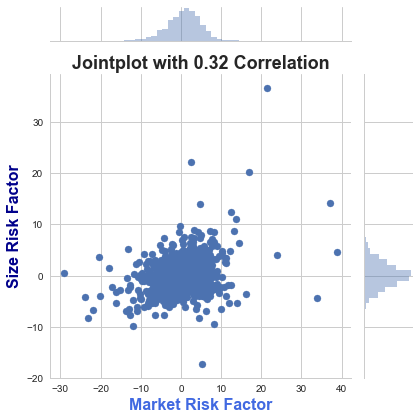

In [158]:
sns.set(style="whitegrid")
w = sns.jointplot(x=market_return,y=small_vs_big)

w.set_axis_labels('x', 'y', fontsize=16)
w.ax_joint.legend_.remove()
w.ax_joint.set_xlabel('Market Risk Factor', fontweight='bold', color='royalblue')
w.ax_joint.set_ylabel('Size Risk Factor', fontweight='bold', color='darkblue')
w.ax_joint.set_title('Jointplot with 0.32 Correlation',fontweight='bold',fontsize=18)

plt.tight_layout()

C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\johfoxwo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


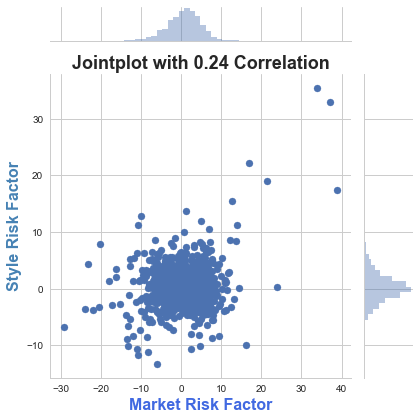

In [159]:
sns.set(style="whitegrid")
w = sns.jointplot(x=market_return,y=value_vs_growth)

w.set_axis_labels('x', 'y', fontsize=16)
w.ax_joint.legend_.remove()
w.ax_joint.set_xlabel('Market Risk Factor', fontweight='bold', color='royalblue')
w.ax_joint.set_ylabel('Style Risk Factor', fontweight='bold', color='steelblue')
w.ax_joint.set_title('Jointplot with 0.24 Correlation',fontweight='bold',fontsize=18)

plt.tight_layout()

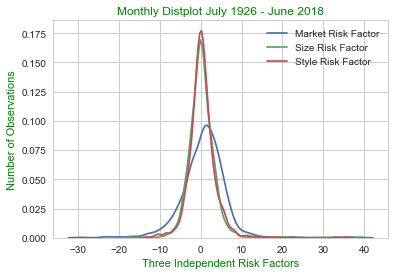

In [160]:
sns.distplot(market_return,label='Market Risk Factor',hist=False)
sns.distplot(small_vs_big,label='Size Risk Factor',hist=False)
sns.distplot(value_vs_growth, label='Style Risk Factor',hist=False)
plt.xlabel('Three Independent Risk Factors',color='green')
plt.ylabel('Number of Observations',color='green')
plt.title('Monthly Distplot July 1926 - June 2018', color='green')
plt.legend()

# Create Training Set

In [164]:
df.head()

,Month,Mkt-RF,SMB,HML,SMALL LoBM-RF,ME1 BM2-RF,SMALL HiBM-RF,BIG LoBM-RF,ME2 BM2-RF,BIG HiBM-RF
0,192607,2.960,-2.300,-2.870,1.152,0.688,-0.289,5.497,1.744,1.202
1,192608,2.640,-1.400,4.190,0.359,1.258,5.134,2.465,2.434,6.065
2,192609,0.360,-1.320,0.010,-2.908,-0.366,-0.667,1.199,-0.159,-1.027
3,192610,-3.240,0.040,0.510,-3.857,-4.677,-2.331,-3.910,-2.666,-4.417
4,192611,2.530,-0.200,-0.350,2.811,3.351,1.784,2.819,2.587,3.151


In [166]:
df20 = (df.groupby('Mkt-RF',group_keys=False).apply(lambda x: x.nlargest(int(len(x)*0.9),'BIG HiBM-RF')))
df20.head()

,Month,Mkt-RF,SMB,HML,SMALL LoBM-RF,ME1 BM2-RF,SMALL HiBM-RF,BIG LoBM-RF,ME2 BM2-RF,BIG HiBM-RF
568,197311,-12.750,-7.740,4.040,-23.140,-18.449,-16.728,-13.101,-10.568,-11.423
522,197001,-8.100,2.900,3.040,-6.675,-5.712,-2.975,-8.662,-9.110,-6.280
588,197507,-6.590,2.680,1.680,-3.382,-2.961,-3.023,-7.990,-4.424,-4.998
410,196009,-5.990,-1.120,1.580,-7.873,-6.024,-6.255,-6.895,-4.527,-5.359
840,199607,-5.970,-3.840,4.470,-14.212,-6.731,-6.028,-5.940,-4.310,-5.190


In [167]:
from sklearn.model_selection import cross_val_score